In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [53]:
print(coordinates)

[(54.85201259112455, 1.4321539564978139), (36.4040498474825, 57.1770412412682), (-71.17473617482153, 91.52221028494358), (-41.237055052702246, 73.6661113237729), (-69.44348949405392, -89.04696991483719), (12.734120270689957, 30.96028417624072), (38.580917533123824, -98.60474217562229), (59.78732478266221, 132.31006273852), (-50.27641072471337, 114.30710844378882), (62.19093792131011, 8.443992932792014), (77.07085093232146, -168.01555476665862), (-33.107046394871865, -155.81935033310594), (23.152252414082426, 139.69638840340104), (11.938389199847308, 11.698384054318211), (63.87798944682831, 162.99880832981427), (17.531142891406034, 139.81584109903542), (70.35417280569487, -174.74293931178107), (14.529402178936536, -30.52413212818243), (-26.343068089244518, 107.55150601617197), (-81.30637101319996, -60.53674226368254), (12.64209096576623, 72.13087266658246), (-18.73019818870273, -63.831775918085484), (-19.218550439428498, 124.01698045236117), (18.388316287040055, -146.17967134621642), (-

In [54]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [55]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [56]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [57]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [58]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [59]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bridlington
Processing Record 2 of Set 1 | sabzevar
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | umm ruwabah
City not found. Skipping...
Processing Record 7 of Set 1 | great bend
Processing Record 8 of Set 1 | amga
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | sunndalsora
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | shingu
Processing Record 14 of Set 1 | damaturu
Processing Record 15 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | porto novo
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | k

Processing Record 37 of Set 4 | nara
Processing Record 38 of Set 4 | northam
Processing Record 39 of Set 4 | pataskala
Processing Record 40 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 41 of Set 4 | merauke
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | skibbereen
Processing Record 46 of Set 4 | colombia
Processing Record 47 of Set 4 | redmond
Processing Record 48 of Set 4 | hondo
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | kemin
Processing Record 1 of Set 5 | bakchar
Processing Record 2 of Set 5 | ewa beach
Processing Record 3 of Set 5 | buraydah
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | sulangan
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | bandarbeyla
Processing Record 9 of Set 5 | nogli

Processing Record 27 of Set 8 | pilar
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | arona
Processing Record 30 of Set 8 | port elizabeth
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | isfana
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | inuvik
Processing Record 36 of Set 8 | maputo
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | new norfolk
Processing Record 40 of Set 8 | grand-lahou
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | amahai
Processing Record 43 of Set 8 | kashiwazaki
Processing Record 44 of Set 8 | grand centre
City not found. Skipping...
Processing Record 45 of Set 8 | lexington
Processing Record 46 of Set 8 | mpika
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | alikalia
Processing Record 49 of Set 8 | rodna
Processing Record 50 of Set 8 | amapa
Proces

Processing Record 17 of Set 12 | potsdam
Processing Record 18 of Set 12 | sakaiminato
Processing Record 19 of Set 12 | csaszar
Processing Record 20 of Set 12 | jibuti
Processing Record 21 of Set 12 | koslan
Processing Record 22 of Set 12 | milkovo
Processing Record 23 of Set 12 | debre birhan
Processing Record 24 of Set 12 | mokrous
Processing Record 25 of Set 12 | vientiane
Processing Record 26 of Set 12 | acapulco
Processing Record 27 of Set 12 | muyezerskiy
Processing Record 28 of Set 12 | manati
Processing Record 29 of Set 12 | manaus
Processing Record 30 of Set 12 | pleshanovo
Processing Record 31 of Set 12 | durango
Processing Record 32 of Set 12 | jumla
Processing Record 33 of Set 12 | khandbari
Processing Record 34 of Set 12 | tiarei
Processing Record 35 of Set 12 | horodok
Processing Record 36 of Set 12 | kandi
Processing Record 37 of Set 12 | berbera
Processing Record 38 of Set 12 | wabag
Processing Record 39 of Set 12 | svetlaya
Processing Record 40 of Set 12 | utete
Process

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bridlington,54.0831,-0.1919,53.78,76,77,21.74,GB,2021-12-12 22:54:03
1,Sabzevar,36.2126,57.6819,40.10,65,2,3.51,IR,2021-12-12 22:54:03
2,Busselton,-33.6500,115.3333,51.08,60,100,8.81,AU,2021-12-12 22:54:03
3,Mahebourg,-20.4081,57.7000,75.49,88,75,17.27,MU,2021-12-12 22:54:04
4,Punta Arenas,-53.1500,-70.9167,50.11,34,0,23.02,CL,2021-12-12 22:51:08
5,Great Bend,38.3645,-98.7648,55.92,26,1,5.01,US,2021-12-12 22:54:04
6,Amga,60.8953,131.9608,-18.65,98,100,2.19,RU,2021-12-12 22:54:05
7,Albany,42.6001,-73.9662,40.80,44,0,9.08,US,2021-12-12 22:54:05
8,Sunndalsora,62.6754,8.5515,37.45,82,95,11.36,NO,2021-12-12 22:54:06
9,Lavrentiya,65.5833,-171.0000,-14.46,88,16,3.27,RU,2021-12-12 22:54:06


In [62]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [64]:
city_data_df = city_data_df[new_column_order]

In [65]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bridlington,GB,2021-12-12 22:54:03,54.0831,-0.1919,53.78,76,77,21.74
1,Sabzevar,IR,2021-12-12 22:54:03,36.2126,57.6819,40.10,65,2,3.51
2,Busselton,AU,2021-12-12 22:54:03,-33.6500,115.3333,51.08,60,100,8.81
3,Mahebourg,MU,2021-12-12 22:54:04,-20.4081,57.7000,75.49,88,75,17.27
4,Punta Arenas,CL,2021-12-12 22:51:08,-53.1500,-70.9167,50.11,34,0,23.02
5,Great Bend,US,2021-12-12 22:54:04,38.3645,-98.7648,55.92,26,1,5.01
6,Amga,RU,2021-12-12 22:54:05,60.8953,131.9608,-18.65,98,100,2.19
7,Albany,US,2021-12-12 22:54:05,42.6001,-73.9662,40.80,44,0,9.08
8,Sunndalsora,NO,2021-12-12 22:54:06,62.6754,8.5515,37.45,82,95,11.36
9,Lavrentiya,RU,2021-12-12 22:54:06,65.5833,-171.0000,-14.46,88,16,3.27


In [66]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

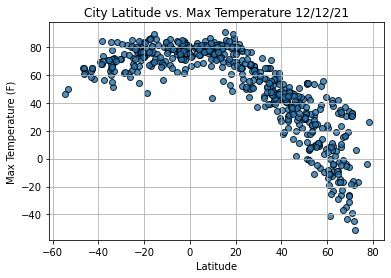

In [68]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

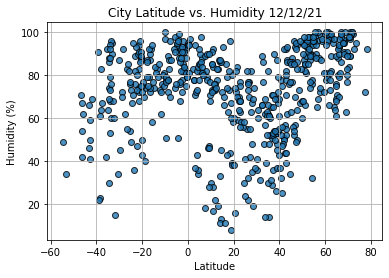

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

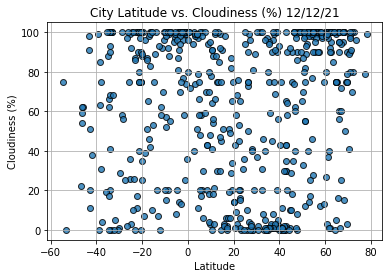

In [70]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

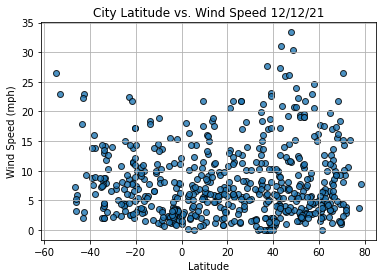

In [71]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()